In [3]:
#Initialization:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
#Downloading the Libraries and Dependencies:
import sys, os, tarfile, urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#Visualization Dependencies:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
ID = "California Housing"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", ID)
if not os.path.isdir(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
  print("Saving Figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

#Ignoring the Warnings:
import warnings
warnings.filterwarnings(action="ignore", message="^ internal")

#Downloading the Dependencies:
# !pip install sweetviz
# import sweetviz as sv
import IPython

In [5]:
#Getting the Data:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()                                                           # Initializing the Function.

#Getting the Data:
def load_housing_data():
    HOUSING_PATH = os.path.join("datasets", "housing")
    csv_path = os.path.join(HOUSING_PATH, "housing.csv")
    return pd.read_csv(csv_path)

#Inspecting the Data:
housing = load_housing_data()
housing.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


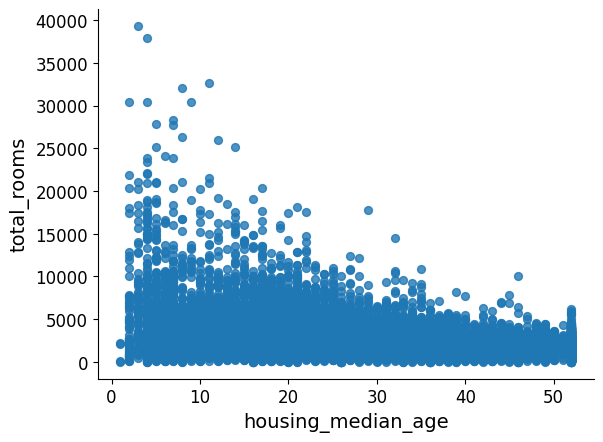

In [6]:
#title housing_median_age vs total_rooms

from matplotlib import pyplot as plt
housing.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
#@ Business Understanding:
print("Business Understanding:")
print("The goal of this project is to predict the median housing prices in California using machine learning techniques.")
print("Understanding the factors influencing housing prices can help stakeholders such as real estate investors, developers, and home buyers to make informed decisions.")
print("We will analyze the California housing dataset to build a predictive model that accurately estimates housing prices based on various features.")

Business Understanding:
The goal of this project is to predict the median housing prices in California using machine learning techniques.
Understanding the factors influencing housing prices can help stakeholders such as real estate investors, developers, and home buyers to make informed decisions.
We will analyze the California housing dataset to build a predictive model that accurately estimates housing prices based on various features.


In [8]:
#Exploratory Data Analysis (EDA):
print("\nExploratory Data Analysis:")
# Summary statistics
print("Summary Statistics:")
print(housing.describe())


Exploratory Data Analysis:
Summary Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000     

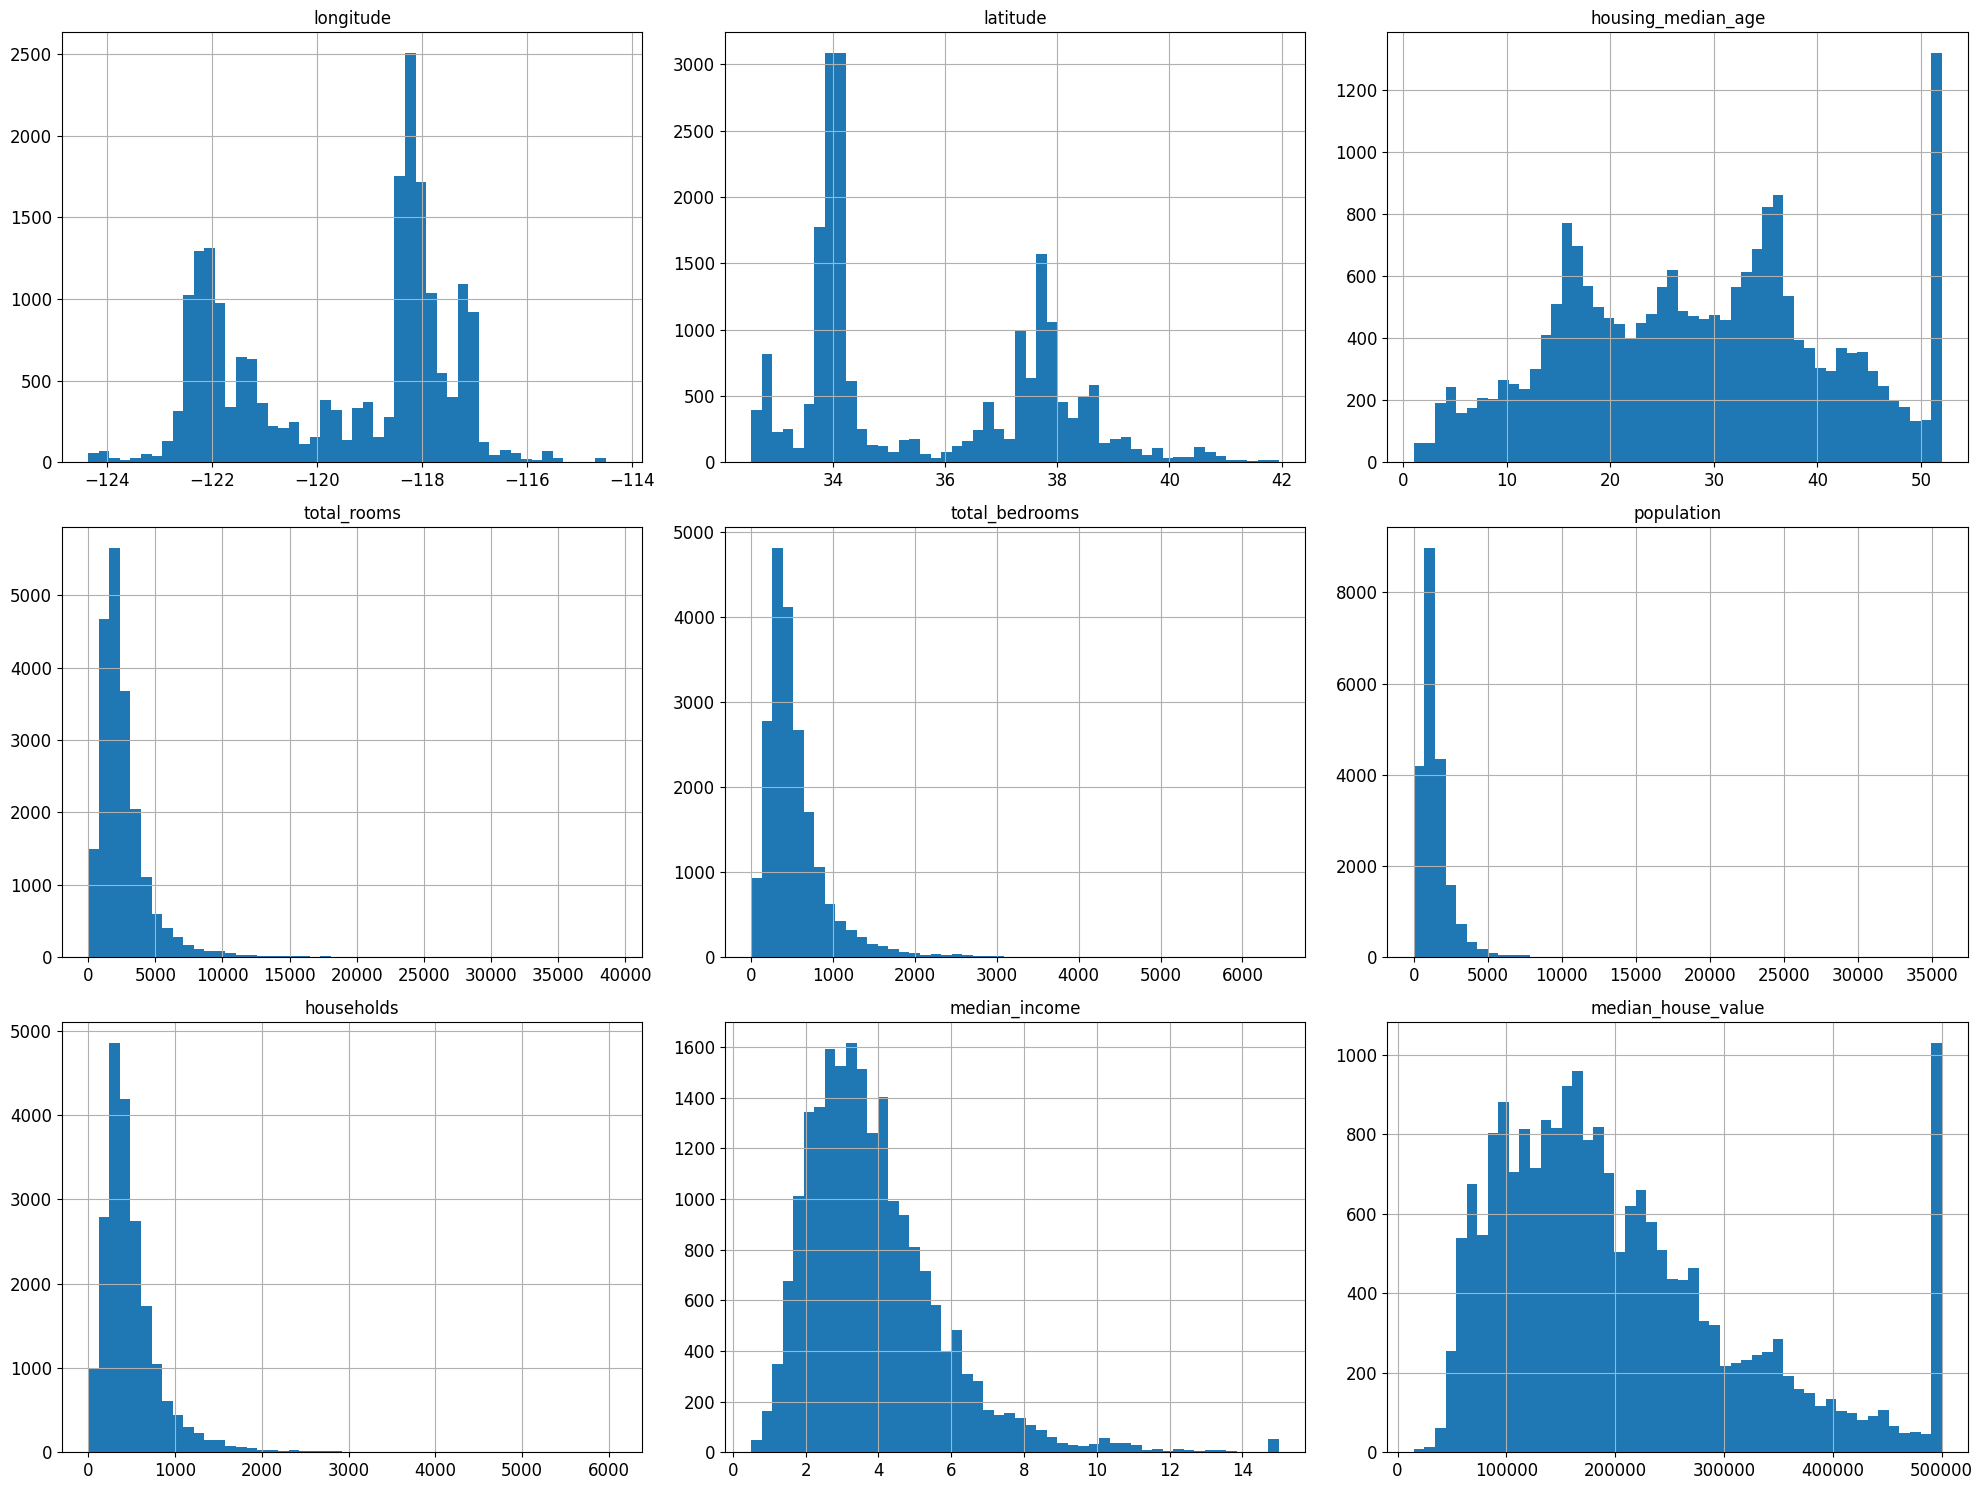

In [9]:
# Histograms of numerical attributes
housing.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

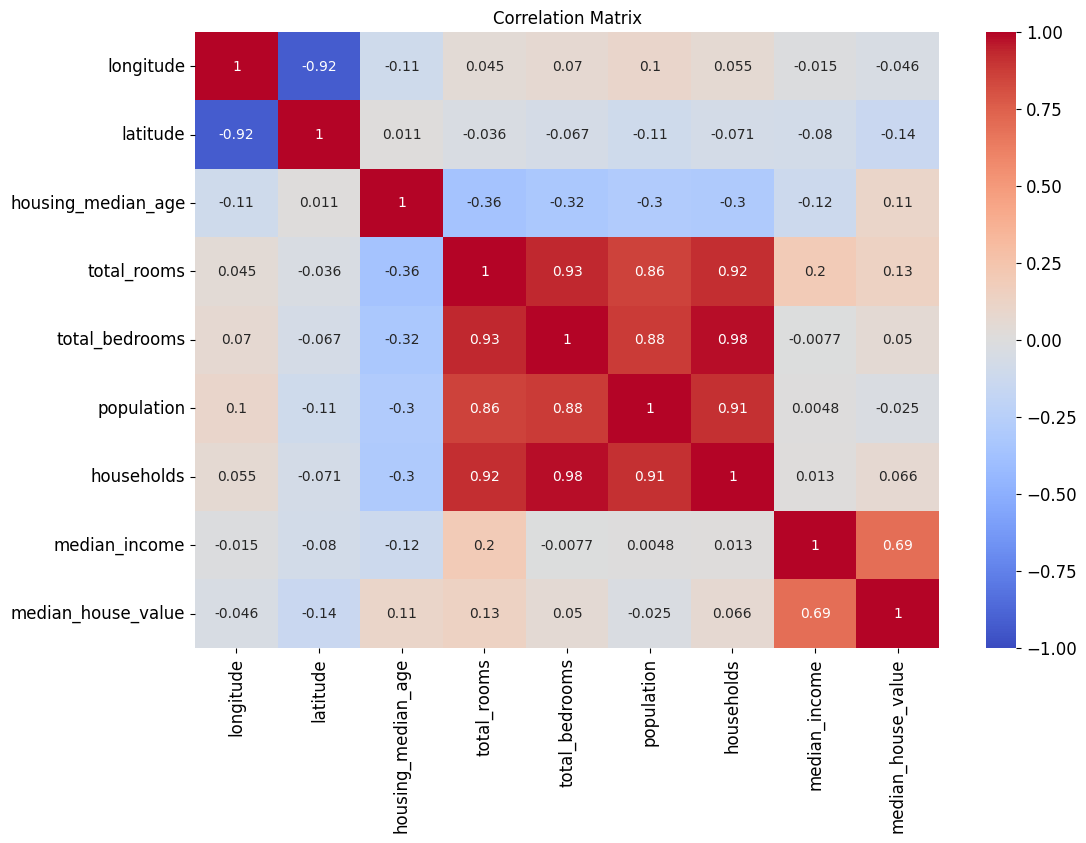

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
housing_numeric = housing.select_dtypes(include=['number'])

# Correlation matrix for numeric columns
corr_matrix = housing_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

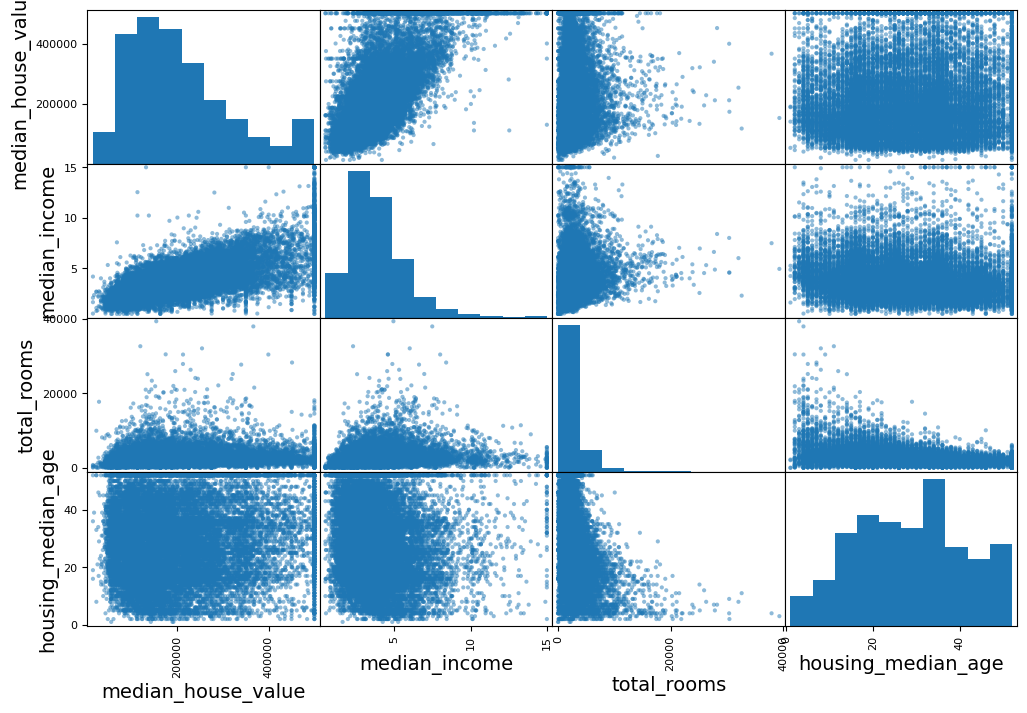

In [12]:
# Scatter plot of median_house_value vs other numerical attributes
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [24]:
#Data Preparation:
print("\nData Preparation:")

#Separate features and target variable
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical and categorical pipelines
num_attribs = list(X.select_dtypes(include=[np.number]).columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot_encoder', OneHotEncoder()),
])

# Full pipeline handling both numerical and categorical features
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])



Data Preparation:


In [25]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [31]:
# Load the data
housing = load_housing_data()

# Split data into features (X) and target (y)
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = ["ocean_proximity"]  # Assuming 'ocean_proximity' is categorical

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform training data
X_train_prepared = preprocessor.fit_transform(X_train)

# Transform testing data (only transform, no fit)
X_test_prepared = preprocessor.transform(X_test)


In [41]:
# Import libraries for modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize RandomForestRegressor model
forest_reg = RandomForestRegressor(random_state=42)

# Fit model to the training data
forest_reg.fit(X_train_prepared, y_train)

# Predictions on training set
y_train_pred = forest_reg.predict(X_train_prepared)

# Calculate RMSE on training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE on training set: {rmse_train}")

# Predictions on test set
y_test_pred = forest_reg.predict(X_test_prepared)

# Calculate RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE on test set: {rmse_test}")


RMSE on training set: 18073.213368485107
RMSE on test set: 48941.70034309343


R2 score on training set: 0.9755650534559848
R2 score on test set: 0.8172104989933294


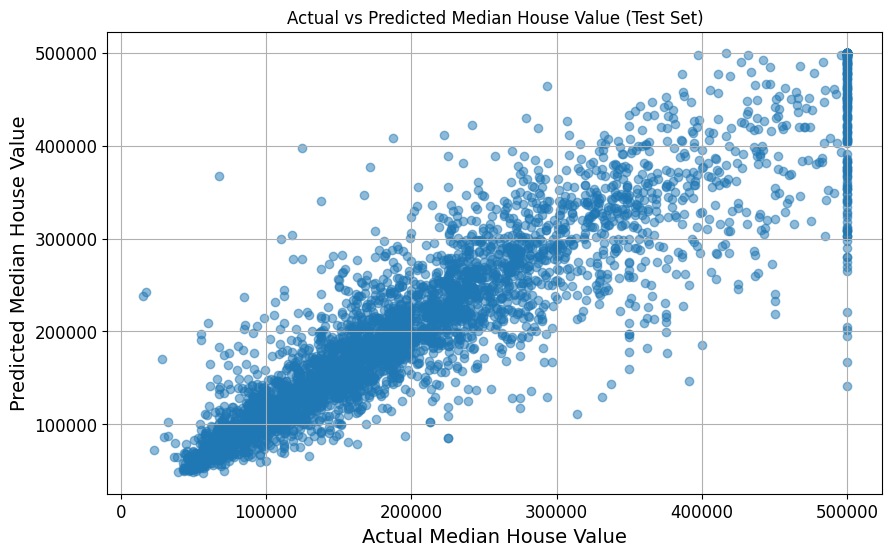

In [42]:
# Evaluate model using additional metrics
from sklearn.metrics import r2_score

# Calculate R2 score on training set
r2_train = r2_score(y_train, y_train_pred)
print(f"R2 score on training set: {r2_train}")

# Calculate R2 score on test set
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 score on test set: {r2_test}")

# Plot predictions vs actual values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value (Test Set)')
plt.grid(True)
plt.show()

In [44]:
#@ Hyperparameter Tuning:
print("\nHyperparameter Tuning:")
# Inisiasi model Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=42)


Hyperparameter Tuning:


In [45]:
# Definisi grid hyperparameter untuk RandomizedSearchCV
param_distribs = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [46]:
# Inisialisasi RandomizedSearchCV
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Persiapkan data untuk training
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Skalasi fitur numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# Transformasi data numerik
num_attribs = list(X.select_dtypes(include=[np.number]).columns)
cat_attribs = ["ocean_proximity"]

In [48]:
# Gabungkan pipeline numerik dan categorical
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])


In [49]:
#Data Understanding:
print(f"Dataset contains {housing.shape[0]} rows and {housing.shape[1]} columns.")
print("Columns in the dataset:")
print(housing.columns)

Dataset contains 20640 rows and 13 columns.
Columns in the dataset:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [50]:
# Check for missing values
missing_values = housing.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [51]:
#@ Evaluation:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

In [52]:
print("Linear Regression Evaluation:")
mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
print(f"MAE: {mae_lr}, RMSE: {rmse_lr}, R2: {r2_lr}")

Linear Regression Evaluation:
MAE: 50670.738240972074, RMSE: 70060.52184473518, R2: 0.6254240620553606


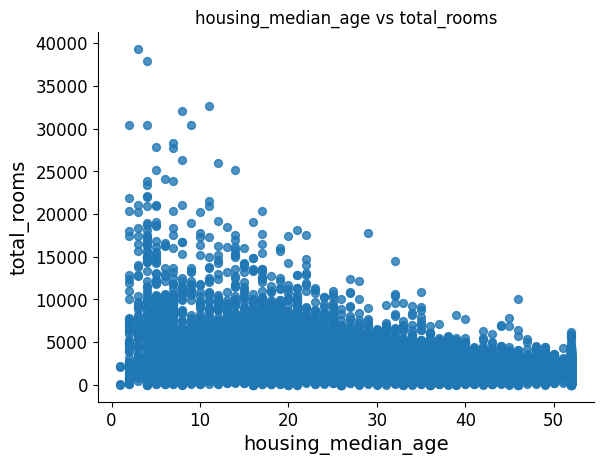

In [56]:
#@ Visualization:
# Visualize housing_median_age vs total_rooms
housing.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("housing_median_age vs total_rooms")
plt.xlabel("housing_median_age")
plt.ylabel("total_rooms")
plt.show()